In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
import cv2
import math

# **CREAR CARPETAS DE IMAGENES EN EL DIRECTORIO DE COLAB**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **LECTURA Y NORMALIZACIÓN DE DATOS**

In [3]:
import tensorflow as tf
batch_size = 750
img_height = 256
img_width = 256
data_dir ='/content/gdrive/My Drive/ImagesADP2/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  #seed=123,
  color_mode="grayscale",
  batch_size=batch_size,
  image_size=(img_height, img_width)
)

ent_imag2, ent_etiq2=next(train_ds.as_numpy_iterator())
X_train, X_test, y_train, y_test = train_test_split(ent_imag2, ent_etiq2, test_size=0.3, random_state=42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


Found 750 files belonging to 3 classes.
(525, 256, 256, 1)
(225, 256, 256, 1)
(525,)
(225,)


# **TRAINING FROM SCRATCH**

In [5]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, UpSampling2D
import cv2

inputs=keras.Input(shape=(256, 256, 1), name="img")
x1 = layers.Conv2D(5, (2,2), padding='same')(inputs)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()
x1 = layers.AveragePooling2D(3)(x1)

x2 = layers.Conv2D(2, (8,8), activation='relu', padding='same')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPool2D(4)(x2)

x3 = layers.Conv2D(6, (4,4), activation='relu', padding='same')(x2)
x3 = layers.BatchNormalization()(x3)

#x1R=resize(size = (21,21))(x1)
#x_skip = layers.add([x1R,x3])

x4 = layers.Conv2D(4, (4,4), activation='relu', padding='same')(x3)
x4 = layers.BatchNormalization()(x4)


y1 = layers.Flatten()(x4)
y2 = layers.Dense(8,activation='relu')(y1)
y3 = layers.Dense(8,activation='relu')(y2)

outputs = layers.Dense(3,activation='softmax')(y3)

model = keras.Model(inputs, outputs, name="DeepGA")
model.summary()



Model: "DeepGA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 5)       25        
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 5)      20        
 hNormalization)                                                 
                                                                 
 average_pooling2d_1 (Averag  (None, 85, 85, 5)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 2)         642       
                                                                 
 batch_normalization_5 (Batc  (None, 85, 85, 2)        8    

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
print("Entrenando modelo...");
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=24,
    epochs=150,
    validation_data=(X_test, y_test)
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/150


ValueError: ignored

In [49]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 9ms/step - loss: 3.7242 - accuracy: 0.7911


[3.7241997718811035, 0.7911111116409302]

# **GRAFICAS DE PRECISION**

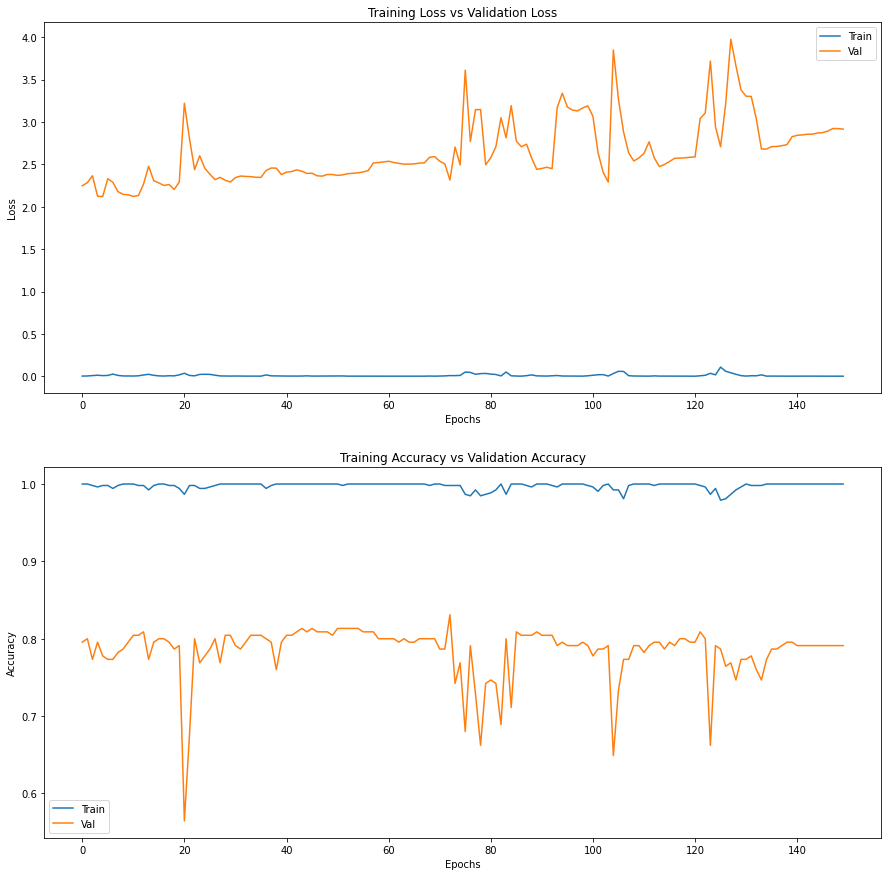

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])